In [1]:
import sys

# adding Folder_2 to the system path
#sys.path.insert(0, '/Users/lisadang/Desktop/Github/SPCA')

import astro_models
import numpy as np
import matplotlib.pyplot as plt
import pickle, os
import batman
import emcee
import astropy
from astropy.time import Time
import h5py
import corner
from matplotlib.ticker import MaxNLocator, ScalarFormatter
from multiprocessing import Pool
import matplotlib.ticker as mticker
from mc3.stats import time_avg
from astropy.modeling.models import BlackBody
from astropy import units as u
from astropy.visualization import quantity_support
import matplotlib.patches as patches
from scipy.optimize import curve_fit


235.0 563.757269478925


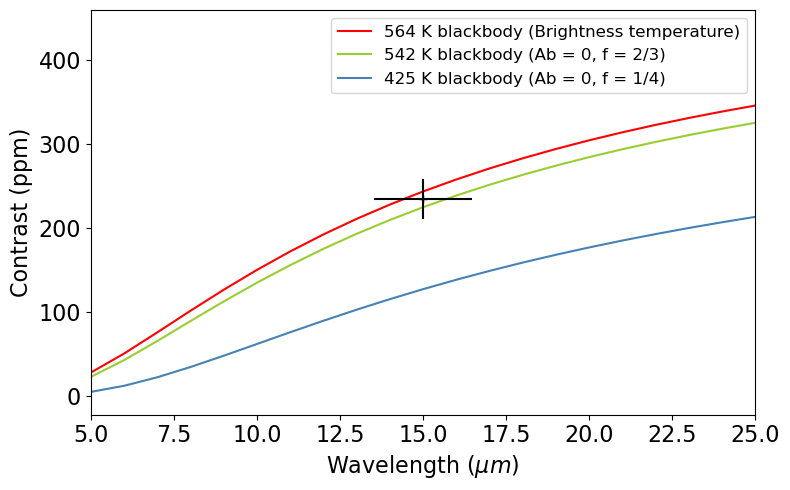

In [3]:
# temperature calculation
t_star = 3096 #3216 
A_b = 0.0
a = 26.57 # ratio a/t_s
f = 2/3 # heat redistribution #2/3 # no heat redristribution
#fp = p0[1]
t_eq_c = t_star * np.sqrt(1/a) * (1/4*(1 - A_b)) ** 0.25 
t_eq_n = t_star * np.sqrt(1/a) * (2/3*(1 - A_b)) ** 0.25 

# plancks law

def t_brightness(fp, l):
    h = 6.62607015e-34
    c = 299792458
    k = 1.380649e-23
    t_star = 3096
    t_depth = 2900
    return ((h * c) / (k * l)) * (np.log(1 + ((np.exp((h * c)/(l * k * t_star)) -1 )/(fp/t_depth)))) ** -1

fp = 0.000235e6
l = 15e-6
t_bright = t_brightness(fp, l)
print(fp, t_bright)

# blackbody
wav = np.arange(0.01, 50) * u.um

bb_s = BlackBody(temperature=t_star*u.K)
bb_c = BlackBody(temperature=t_eq_c*u.K)
bb_n = BlackBody(temperature=t_eq_n*u.K)
bb_bright = BlackBody(temperature=t_bright*u.K)
flux_s = bb_s(wav)
flux_c = bb_c(wav)
flux_n = bb_n(wav)
flux_bright = bb_bright(wav)

# blackbody ratio graph

with quantity_support():
    plt.figure(figsize=(8, 5))
    #plt.plot()
    plt.plot(wav, 0.05486**2*(flux_bright / flux_s)*1e6, label = '%3.f K blackbody (Brightness temperature)' %t_bright, color = 'red')
    plt.plot(wav, 0.05486**2*(flux_n / flux_s)*1e6, label = '542 K blackbody (Ab = 0, f = 2/3)', color = 'yellowgreen')    
    plt.plot(wav, 0.05486**2*(flux_c / flux_s)*1e6, label = '425 K blackbody (Ab = 0, f = 1/4)', color = 'steelblue') 
    plt.errorbar(15, fp, yerr=2.35e-05*1e6, xerr = 2.92/2, fmt='+', color='k')
    plt.ylabel('Contrast (ppm)', fontsize=16)
    plt.xlabel('Wavelength '+r'$(\mu m)$', fontsize=16)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.legend(fontsize=12)
    #plt.ylim(0, 5000)
    plt.xlim(5, 25)
    plt.tight_layout()
    plt.gcf().patch.set_facecolor('None')
    plt.show()